# **PREPARATION**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA WRANGLING**

## **Data Gathering**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_iris = pd.read_csv('/content/drive/My Drive/Colab Notebooks/iris/Iris.csv')

In [5]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## **Assessing Data**

**Missing value**

In [7]:
df_iris.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


**Invalid Value (hanya sebagai contoh)**

In [8]:
invalid_values = df_iris[df_iris['SepalLengthCm']>10]
print ('Invalid Values: \n', invalid_values)

Invalid Values: 
 Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


**Duplicate Data**

In [9]:
df_iris.duplicated().sum()

0

**Inaccurate Value (hanya sebagai contoh)**

In [10]:
inaccurate_values = df_iris[(df_iris['PetalLengthCm'] < 1) | (df_iris['PetalWidthCm'] > 10 )]
print('Inaccurate Values: \n', inaccurate_values)

Inaccurate Values: 
 Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


**Inconsistent Value (hanya sebagai contoh)**

In [11]:
# Contoh: Cek konsistensi format tanggal

# df['Date'] = ['2023-01-01', '01-02-2023', '2023/03/01', '2023-04-01', '2023-05-01']
# inconsistent_dates = df[~df['Date'].str.match(r'\d{4}-\d{2}-\d{2}')]
# print("Inconsistent Dates:\n", inconsistent_dates)

**Outlier**

In [12]:
Q1 = df_iris['SepalLengthCm'].quantile(0.25)
Q3 = df_iris['SepalLengthCm'].quantile(0.75)
IQR = Q3 - Q1

In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}')
print(f'Batas Bawah: {lower_bound}, Batas Atas: {upper_bound}')

Q1: 5.1, Q3: 6.4, IQR: 1.3000000000000007
Batas Bawah: 3.1499999999999986, Batas Atas: 8.350000000000001


In [15]:
outliers_SepalLength = df_iris[(df_iris['SepalLengthCm'] < lower_bound) | (df_iris['SepalLengthCm'] > upper_bound)]

In [16]:
print('Outliers di Sepal Length:\n', outliers_SepalLength)

Outliers di Sepal Length:
 Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


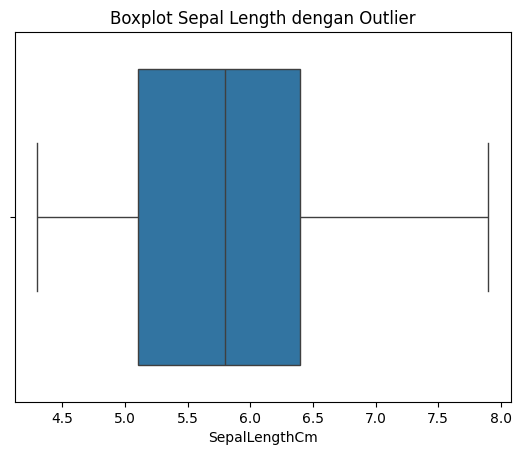

In [17]:
sns.boxplot(x=df_iris['SepalLengthCm'])
plt.title('Boxplot Sepal Length dengan Outlier')
plt.show()

## **Cleaning Data**

### Teknik untuk mengatasi Missing Value

**Dropping**

In [18]:
# df_iris.dropna(axis=0, inplace=True)

**Imputation**

In [19]:
# df_iris.PetalLengthCm.fillna(value=df_iris.PetalLengthCm.mean(), inplace=True)

**Interpolation**

In [20]:
# df_iris.PetalLengthCm.interpolate(method='linear', limit_direction='forward', inplace=True)

### Teknik untuk mengatasi Outlier

**Drop**

In [21]:
# df_iris.drop(df_iris[outliers_SepalLength].index, inplace=True)

**Imputation**

In [22]:
# df_iris.mask(cond=outliers_SepalLength, other=upper_bound, axis=1, inplace=True)

# df_iris["SepalLengthCm"] = df_iris["SepalLengthCm"].where(~outliers_SepalLength, upper_bound, axis=1)

### Teknik untuk mengatasi Duplicate Data

In [23]:
# df_iris.drop_duplicates(inplace=True)

# **EXPLORATORY DATA ANALYSIS**

### **UNIVARIATE ANALYSIS**

Bagaimana distribusi dari setiap fitur (sepal length, sepal width, petal length, petal width) untuk setiap spesies (setosa, versicolor, virginica)?

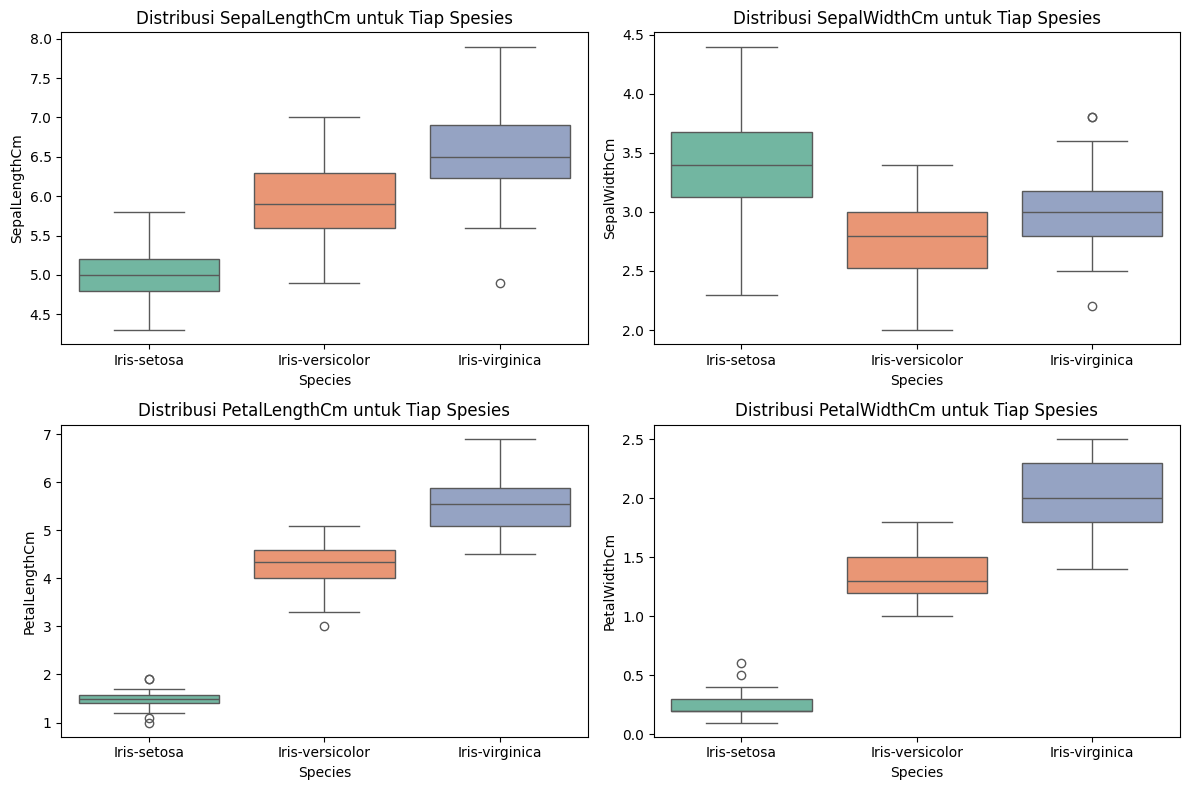

In [44]:
# Membuat figure dengan 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Boxplot untuk masing-masing fitur
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    sns.boxplot(data=df_iris, x='Species', y=feature, hue='Species', palette="Set2", ax=axes[row, col], legend=False)
    axes[row, col].set_title(f"Distribusi {feature} untuk Tiap Spesies")

plt.tight_layout()
plt.show()

### **BIVARIATE ANALYSIS**

Apakah ada korelasi yang kuat antara fitur-fitur seperti sepal length dan petal length?

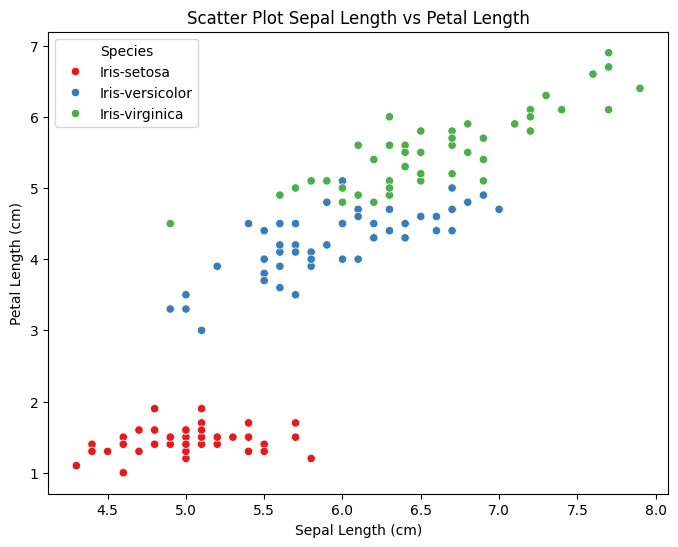

In [41]:
# Scatter plot untuk melihat hubungan langsung antara Sepal Length dan Petal Length
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_iris, x='SepalLengthCm', y='PetalLengthCm', hue='Species', palette='Set1')
plt.title("Scatter Plot Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()

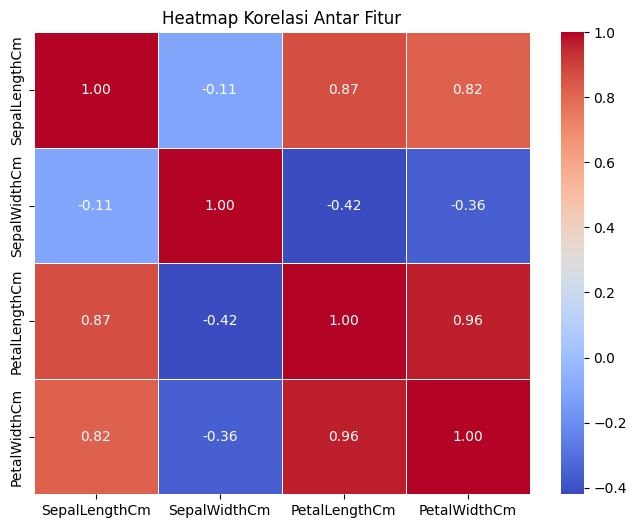

In [42]:
# Menghitung matriks korelasi
corr_matrix = df_all.iloc[:, 1:-1].corr()  # Mengambil semua fitur kecuali 'Id' dan 'Species'

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()


Sepal Length dan Petal Length memiliki korelasi 0.87, yang menunjukkan hubungan positif yang kuat.
Sepal Length dan Petal Width juga memiliki korelasi yang cukup tinggi, yaitu 0.82.
Petal Length dan Petal Width memiliki korelasi 0.96, yang menunjukkan hubungan yang sangat kuat.
Sepal Width memiliki korelasi negatif dengan fitur lain, terutama dengan Petal Length (-0.42) dan Petal Width (-0.36), yang berarti semakin besar Sepal Width, semakin kecil ukuran petal dalam banyak kasus.

Jika Anda membangun model klasifikasi sederhana (misalnya, decision tree atau logistic regression), fitur mana yang paling penting untuk membedakan spesies?

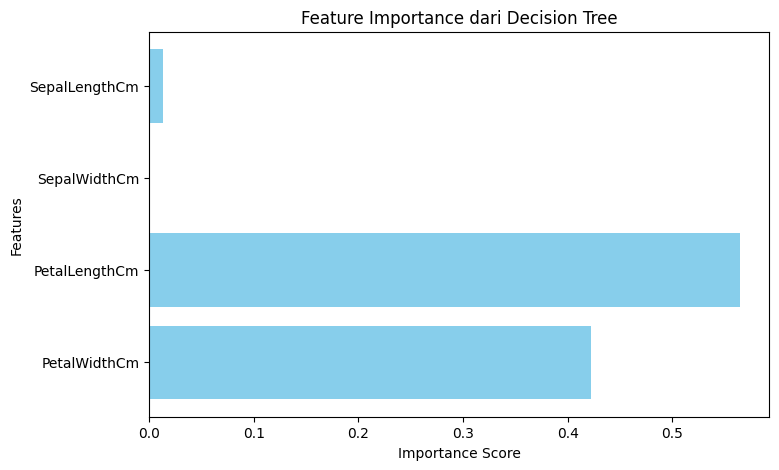

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Mengambil fitur dan label
X = df_iris.iloc[:, 1:-1]  # Semua fitur tanpa 'Id' dan 'Species'
y = df_iris['Species']  # Label spesies

# Melatih model Decision Tree sederhana
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Mendapatkan pentingnya fitur
importances = model.feature_importances_

# Visualisasi dalam bentuk bar chart
plt.figure(figsize=(8, 5))
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance dari Decision Tree")
plt.gca().invert_yaxis()
plt.show()

# **CONCLUSION**

Bagaimana distribusi dari setiap fitur (sepal length, sepal width, petal length, petal width) untuk setiap spesies (setosa, versicolor, virginica)?


> Distribusi setiap fitur untuk setiap spesies memiliki pola yang konsisten. Spesies Iris-Setosa memiliki ukuran yang paling kecil untuk semua fitur terkecuali fitur Sepal Width yang mana spesies Iris-Setosa memiliki ukuran yang lebih besar dibanding spesies lainnya. Spesies Iris-Versicolor memiliki ukuran yang lebih besar dari Spesies Iris-Setosa untuk semua fitur terkecuali fitur Sepal Width yang mana Spesies Iris-Versicolor memiliki ukuran yang lebih kecil dibanding Spesies Iris-Setosa. Sementara itu, Spesies Iris-Virginica memiliki ukuran paling besar untuk semua fitur terkecuali fitur Sepal Width yang mana memiliki ukuran cenderung lebih rendah di antara spesies lainnya.

Apakah ada korelasi yang kuat antara fitur-fitur seperti sepal length dan petal length?



> Ya, terdapat korelasi yang kuat antara beberapa fitur, terutama antara Sepal Length dan Petal Length dengan nilai korelasi 0.87. Selain itu, Petal Length dan Petal Width memiliki korelasi yang sangat kuat (0.96), menunjukkan bahwa ketika panjang petal meningkat, lebar petal juga cenderung meningkat. Sebaliknya, Sepal Width memiliki korelasi negatif dengan fitur lainnya, terutama dengan Petal Length dan Petal Width. Hal ini menunjukkan bahwa Sepal Width mungkin memiliki hubungan yang berbeda dibandingkan fitur lainnya dalam mendeskripsikan spesies bunga iris.


Jika Anda membangun model klasifikasi sederhana (misalnya, decision tree atau logistic regression), fitur mana yang paling penting untuk membedakan spesies?


> Tentu fitur tersebut adalah fitur Petal Length, Petal Width, dan Sepal Width. Kenapa Sepal Length tidak masuk? Hal ini dikarenakan ukuran Sepal Length antar spesies tidak memiliki perbedaan yang signifikan, bahkan cenderung sama. Hal ini tentu akan menyulitkan untuk proses klasifikasi di masa mendatang. Lain halnya dengan Petal Length, Petal Width, dan Sepal Width yang memiliki taraf perbedaan ukuran yang cukup signifikan untuk dapat dibedakan. Sehingga hal ini dapat membantu proses pengklasifikasian spesies di masa mendatang. Namun dari ketiga fitur ini, Petal Length dan Petal Width adalah fitur yang paling kuat untuk pengklasifikasian di masa mendatang.
